# Chapter.03 파이썬을 이용한 데이터 분석

## 3.1 파이썬을 이용한 기술통계 : 1변량 데이터

### 3.1.1 통계 처리와  scipy

In [6]:
import numpy as np
import scipy as sp

In [2]:
# 표시 자릿수 지정(소수점 이하 자릿수가 3이된다.)

%precision 3

'%.3f'

### 3.1.2 1변량 데이터의 관리

In [4]:
# 1변량 데이터 : 1가지 종류의 데이터밖에 없을 경우

fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### 3.1.3 합계와 샘플 사이즈

In [7]:
# scipy 함수 사용 - sum 함수

sp.sum(fish_data)

40

In [8]:
# 샘플사이즈는 파이썬 표준함수로 구하자

len(fish_data)

10

### 3.1.4 평균값(기댓값)

In [9]:
# 평균값의 계산식 코드로 구현

N = len(fish_data)
sum_value = sp.sum(fish_data)
mu = sum_value / N
mu

4.0

In [10]:
sp.mean(fish_data)

4.0

### 3.1.5 표본분산
분산 : 데이터가 평균값에서 얼마나 떨어져있는지 나타내는 지표

In [12]:
# 파이썬 코드로 식 구현하기
sigma_2_sample = sp.sum((fish_data - mu) ** 2) / N
sigma_2_sample

1.2

In [15]:
sp.var(fish_data, ddof = 0)

1.2

### 3.1.6 불편분산

In [16]:
# 코드로 구현하기
sigma_2 = sp.sum((fish_data - mu) ** 2)/(N-1)
sigma_2

1.3333333333333333

In [17]:
sp.var(fish_data, ddof = 1)

1.3333333333333333

### 3.1.7 표준편차
    : 분산에 루트를 취한 값

In [18]:
# 코드로 구현하기
# sqrt : 루트값 계산
sigma = sp.sqrt(sigma_2)
sigma

1.1547005383792515

In [19]:
sp.std(fish_data, ddof = 1)

1.1547005383792515

### 3.1.5 표준화
: 데이터의 평균을 0으로, 표준편차(분산)을 1로 하는 변환


-> 여러 변수를 다룰 때 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.

In [20]:
# 데이터의 평균값을 0으로 하는 것은 모든 데이터에서 평균값을 빼는 것으로 달성할 수 있다.
fish_data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [21]:
# 이 평균값은 0이 된다.
sp.mean(fish_data - mu)

0.0

In [22]:
# 데이터의 표준편차(분산)을 1로 만드는 방법 
    # : 데이터를 일률적으로 표준편차로 나누는 것
fish_data / sigma

array([1.732, 2.598, 2.598, 3.464, 3.464, 3.464, 3.464, 4.33 , 4.33 ,
       5.196])

In [23]:
# fish_data / sigma의 표준편차는 1이된다.
sp.std(fish_data / sigma, ddof=1)

1.0

In [24]:
# 두 변환을 합치면 평균이 0, 표준편차(분산)이 1인 데이터로 변환
standard = (fish_data - mu ) / sigma
standard

array([-1.732, -0.866, -0.866,  0.   ,  0.   ,  0.   ,  0.   ,  0.866,
        0.866,  1.732])

In [25]:
sp.mean(standard)

2.2204460492503132e-17

In [26]:
sp.std(standard, ddof =1)

1.0

### 3.1.9 그 이외의 통계량

In [27]:
# 최댓값 : amax 함수
sp.amax(fish_data)

6

In [28]:
# 최솟값 : amin 함수
sp.amin(fish_data)

2

In [29]:
# 중앙값 : median 함수
sp.median(fish_data)

4.0

In [30]:
# 좌우 비대칭 데이터로 평균값과 중앙값 구하기
fish_data_2 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 100])

In [31]:
sp.mean(fish_data_2)

13.4

In [32]:
sp.median(fish_data_2)

4.0

### 3.1.10 scipy.stats와 사분위수

In [33]:
# scipy 패키지 아네 있는 통계분석에 특화된 함수 사용할 수 있다.
from scipy import stats

사분위수 : 데이터를 순서대로 늘어놓았을 때 아래에서부터 25%, 75%에 해당하는 값

In [34]:
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
stats.scoreatpercentile(fish_data_3, 25)

3.0

In [35]:
# 작은 것 부터 늘어놓았을때 75%에 해당하는 값
stats.scoreatpercentile(fish_data_3, 75)

7.0

## 3.2 파이썬을 이용한 기술통계 : 다변량 데이터
다변량 데이터 : 여러 개의 변수를 조합한 데이터
* 깔끔한 데이터로 만드는 것이 중요하다.

### 3.2.1 깔끔한 데이터

<깔끔한 데이터의 특징> : 분석하기 쉽게 정리한 표 형태의 데이터

1. 개별 값이 하나의 셀을 이룬다.
2. 개별 변수가 하나의 열을 이룬다.
3. 개별 관측이 하나의 행을 이룬다.
4. 개별 관측 유닛 유형이 하나의 표를 이룬다.

* 깔끔한 데이터는 의미와 구조가 대응함.

장점 : 복잡한 데이터를 모을 때, 통일성 있는 처리를 할 수 있다.

-> 즉, 소프트웨어로 다루기 쉬운 형식

### 3.2.4 다변량 데이터 관리하기

In [36]:
# 수치 계산에 사용하는 라이브러리
import pandas as pd
import scipy as sp

# 표시 자릿수 지정
%precision 3

'%.3f'

In [37]:
fish_multi = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-2-1-fish_multi.csv")
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


### 3.2.5 그룹별 통계량 계산하기

In [38]:
# groupby함수 : 데이터를 그룹화
# 이를 이용하여 평균 구하기

group = fish_multi.groupby("species")
print(group.mean())

         length
species        
A             3
B             8


In [39]:
# 표준편차 구하기

print(group.std(ddof=1))

         length
species        
A           1.0
B           2.0


In [40]:
# 평균이나 표준편차 등을 백분위 값으로 정리하여 출력

group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### 3.2.6 교차분석표 구현하기

In [41]:
shoes = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-2-2-shoes.csv")
print(shoes)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [42]:
# 깔끔한 데이터를 읽어들여 표로 변환하기

# pivot_table 함수 : 여러가지 형태의 데이터 모음 확인
cross = pd.pivot_table(
    data = shoes, # 데이터 지정
    values = "sales", # 데이터를 모을 열 지정
    aggfunc = "sum", # 데이터를 모을 함수 지정
    index = "store", # 교차분석표의 행 지정
    columns = "color" # 교차분석표의 열 지정
)
print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


### 3.2.7 공분산
: 2개의 연속형 변수의 관계성을 확인하는 통계량

* 공분산이 0보다 클 때 : 변수 한쪽이 큰 값을 갖게 되면 다른 한 쪽도 커진다.
* 공분산이 0보다 작을 때 : 변수 한 쪽이 큰 값을 갖게 되면 다른 한 쪽은 작아진다.
* 공분산이 0일 때 : 변수 사이에 관계성이 없다.

### 3.2.8 분산 - 공분산 행렬
: 여러 변수의 분산과 공분산 목록을 행렬 형태로 정리한 것

### 3.2.9 공분산(실습)

In [44]:
cov_data = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [45]:
# 공분산 계산하는 데 사용할 요소들 계산하기

# 데이터 분리
x = cov_data["x"]
y = cov_data["y"]
# 표본 크기
N = len(cov_data)
# 평균값 계산
mu_x = sp.mean(x)
mu_y = sp.mean(y)

In [58]:
# 공분산 계산
cov_sample = sum((x - mu_x) * (y - mu_y)) / N
cov_sample

6.906

In [52]:
# 분모 N-1 로 설정하여 공분산 계산해보기
cov = sum((x - mu_x) * (y - mu_y)) / (N-1)
cov

7.673

### 3.2.10 분산-공분산 행렬(실습)

In [48]:
# scipy의 cov 함수 : 분산-공분산 행렬 계산 가능

sp.cov(x, y, ddof=0)

array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [49]:
# 분모 N-1 로 설정하여 분산-공분산 계산해보기

sp.cov(x, y, ddof=1)

array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

### 3.2.11 피어슨 상관계수
* 상관계수라고 하면 대부분은 피어슨 상관계수를 뜻한다
* 이 식은 공분산을 최댓값 1, 최솟값 -1 사이가 되도록 표준화하는 것이다.

*** 공분산은 편리한 지표지만 최댓값이나 최솟값이 얼마가 될지 알 수 없고, 단위가 변화면 공분산의 값도 변하므로 사용하기 편하도록 보정한다.

### 3.2.12 상관행렬
: 여러 변수의 상관계수들을 행렬 형태로 정리한 것

### 3.2.13 피어슨 상관계수(실습)

In [53]:
# 분산 계산
sigma_2_x = sp.var(x, ddof = 1)
sigma_2_y = sp.var(y, ddof = 1)

# 상관계수
rho = cov/sp.sqrt(sigma_2_x * sigma_2_y)
rho

0.7592719041137088

In [59]:
# 분모와 분자가 같은 값으로 나눠져서, 분산과 공분산 계산식의 분모에 N을 사용하든 N-1 사용하든 상관계수 변하지 않는다.

# 분산 계산
sigma_2_x_sample = sp.var(x, ddof = 0)
sigma_2_y_sample = sp.var(y, ddof = 0)
# 상관계수
cov_sample / sp.sqrt(sigma_2_x_sample * sigma_2_y_sample)

0.7592719041137087

In [65]:
# scipy의 corrcoef 함수 : 상관행렬을 계산
sp.corrcoef(x, y)

array([[1.   , 0.759],
       [0.759, 1.   ]])

### 3.2.14 상관계수가 무의미할때
* 상관계수는 여러 변수 사이의 관계를 확인할 때 자주 사용되는 지표지만 만능은 아님

## 3.3 matplotlib과 seaborn을 이용한 데이터 시각화

### 3.3.2 시각화를 위한 준비

In [66]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
# 표시 자릿수 지정
%precision 3
# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.3.3 pyplot을 이용한 꺾은선 그래프

In [67]:
# 꺾은선 그래프 : 데이터의 변화를 보기 쉽게 한 그래프
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

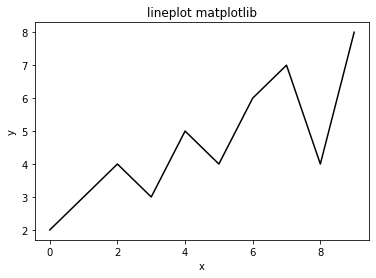

In [68]:
# 그래프 그리기
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### 3.3.4 seaborn과 pyplot을 이용한 꺾은선 그래프

In [69]:
import seaborn as sns
sns.set() # 그래프의 디자인이 바뀜

Text(0, 0.5, 'y')

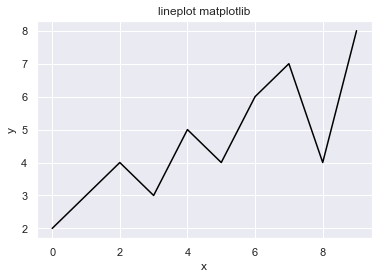

In [70]:
# 앞과 똑같이 그래프 그리기
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### 3.3.5  seaborn을 이용한 히스토그램

In [71]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

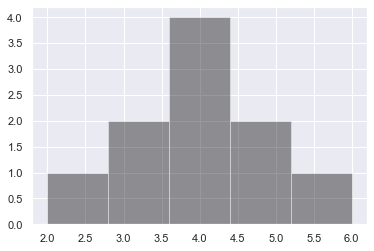

In [75]:
sns.distplot(fish_data, bins = 5, color = 'black', kde=False)

### 3.3.6 커널밀도추정에 따른 히스토그램 평활화
커널밀도추정 : 히스토그램이 가진 문제를 해소하기 위한 방법


* 히스토그램의 문제 ?
    : 구간을 어떻게 정하느냐에 따라 모양이 크게 바뀐다.

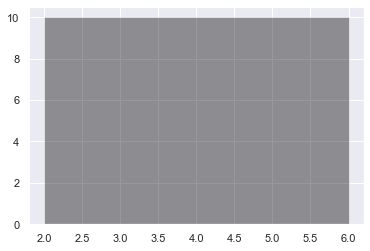

In [76]:
# 예) bins =1로 지정하면 데이터 특징 전혀 안드러남
sns.distplot(fish_data, bins = 1, color = 'black', kde=False)

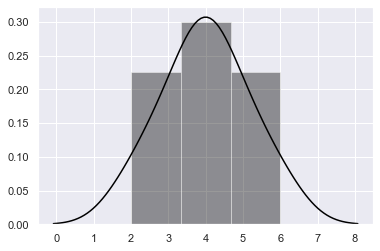

In [77]:
# 커널밀도추정의 결과를 표시하기 
    # : kde 지우기, bins 지정하지 않기
sns.distplot(fish_data, color = 'black')

### 3.3.7 2변량 데이터에 대한 히스토그램

In [81]:
fish_multi = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [82]:
# 종류별로 통계량 계산
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [83]:
# 종류별 몸길이 데이터 추출, 각각의 변수에 저장
length_a = fish_multi.query("species == 'A'")["length"]
length_b = fish_multi.query("species == 'B'")["length"]

In [85]:
length_a

0    2
1    3
2    3
3    4
4    4
5    4
6    4
7    5
8    5
9    6
Name: length, dtype: int64

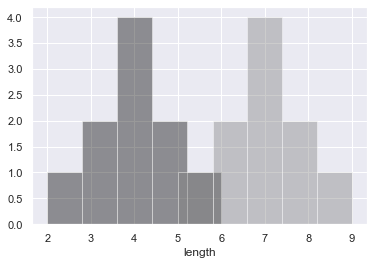

In [86]:
# 히스토그램 그리는거 두번하면 겹칠 수 있음
sns.distplot(length_a, bins =5, color = 'black', kde=False)
sns.distplot(length_b, bins =5, color = 'gray', kde = False)

### 3.3.8 다변량 데이터를 시각화하는 코드 작성

seaborn을 사용할 경우 아래와 같은 형식이다

In [88]:
# sns.함수명(
    # x = "x축의 열 이름",
    # y = "y축의 열 이름",
    # data = 데이터프레임,
    # 그_외의_인수
# )

### 3.3.9 상자그림
: "카테고리 변수 * 수치형 변수" 조합의 데이터를 표시할 경우 많이 사용한다 (박스플롯)

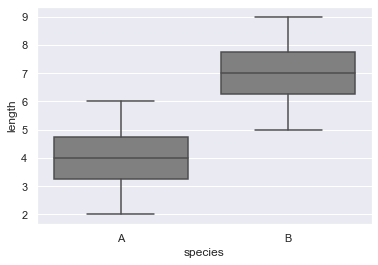

In [89]:
sns.boxplot(x = "species", y = "length", data = fish_multi, color = "gray")

### 3.3.10 바이올린플롯
: 상자그림의 상자 대신 커널밀도추정의 결과를 사용한 것. 가독성이 좋다.

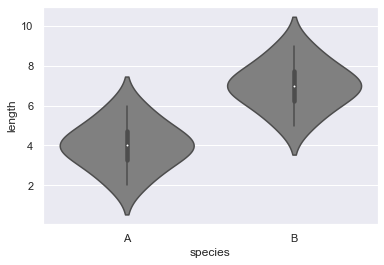

In [90]:
sns.violinplot(x = "species", y = "length", data = fish_multi, color='gray')

### 3.3.11 막대그래프
: 상자그림과 비교하면 정보가 적다

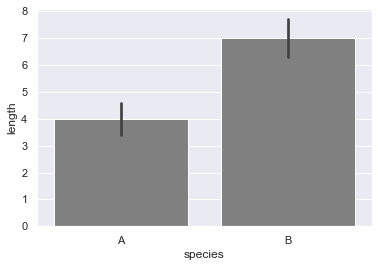

In [92]:
sns.barplot(x = "species", y = "length", data = fish_multi, color = "gray")

### 3.3.12 산포도
: 수치형 변수 * 수치형 변수

In [93]:
cov_data = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


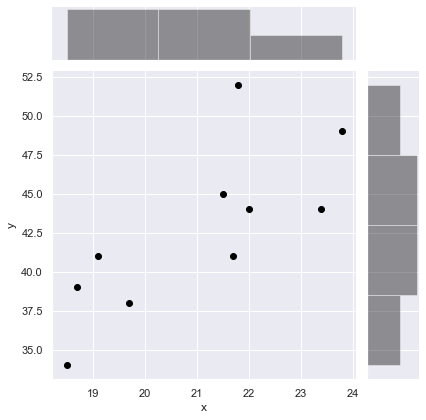

In [94]:
sns.jointplot(x ="x", y = "y", data = cov_data, color="black")

### 3.3.13 페어플롯
: 많은 양의 변수를 가지고 있는 데이터 대상

In [95]:
iris = sns.load_dataset("iris")
iris.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [97]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


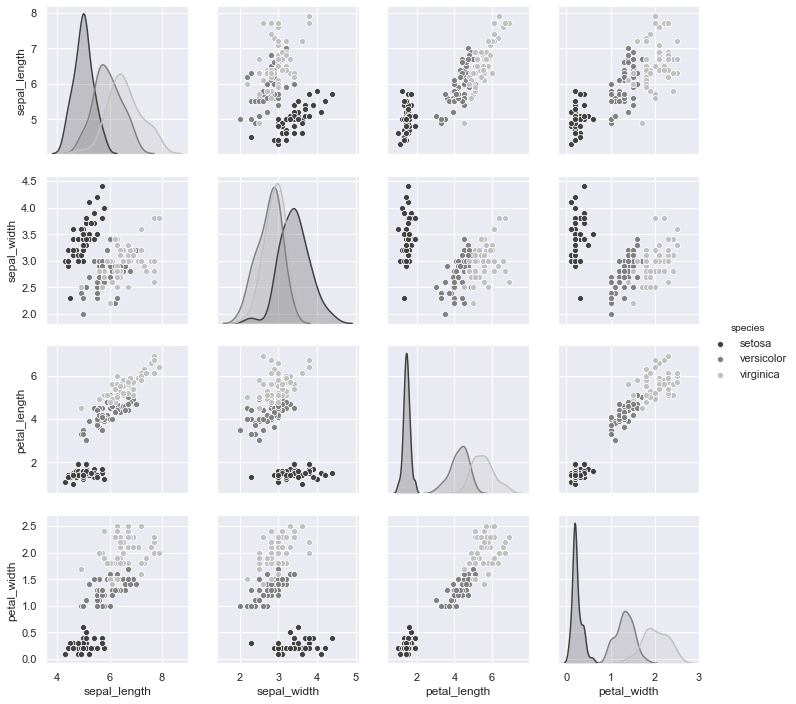

In [98]:
sns.pairplot(iris, hue = "species", palette = "gray")

## 3.4 모집단에서 표본 추출 시뮬레이션

### 3.4.1 라이브러리 임포트

In [100]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.4.2 표본을 얻는 프로세스

표본은 확률변수. 즉, 확률적으로 변화하는 값

### 3.4.3. 5마리 물고기의 예

In [101]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [103]:
# 랜덤으로 고르고 싶을때 : np.random.choice
    # replace = False : 같은 물고기 2번이상 선택 X
np.random.choice(fish_5, size = 1, replace = False)

array([5])

In [104]:
np.random.choice(fish_5, size = 3, replace=False)

array([6, 5, 4])

In [105]:
np.random.choice(fish_5, size = 3, replace=False)

array([3, 4, 5])

In [106]:
# np.random.seed(난수시드) : 매번 같은 데이터가 랜덤하게 선택됨.
# 인수로 넘기는 값은 아무거나 괜찮다. 인수로 같은 값을 지정하면 같은 결과가 나옴
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [107]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [108]:
# 골라낸 표본의 평균값 계산 -> 표본평균
np.random.seed(1)
sp.mean(
    np.random.choice(fish_5, size=3, replace=False)
)

4.333333333333333

### 3.4.4 난수
: 랜덤으로 골라낸 값. 분야에 따라 확률변수와 거의 같은 의미이다.

### 3.4.5 복원추출과 비복원 추출
*복원추출 : 추출된 표본을 다시 모집단에 되돌려놓음으로써 다시 추출될 수 있게 하는 샘플링 방법

*비복원추출 : 추출된 표본을 모집단에 다시 돌려 놓지 않는다(replace=False)

### 3.4.6  더 많은 물고기가 있는 호수에서 표본추출

In [109]:
fish_10000 = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-4-1-fish_length_100000.csv")
fish_10000.head()

,length
0,5.297442
1,3.505566
2,3.572546
3,3.135979
4,4.689275


In [110]:
len(fish_10000)

100000

In [115]:
# 표본 추출하기(10마리 샘플링)
sampling_result = np.random.choice(fish_10000, size=10, replace = False)
sampling_result

ValueError: 'a' must be 1-dimensional

In [114]:
# 표본평균 계산
sp.mean(sampling_result)

NameError: name 'sampling_result' is not defined

### 3.4.7 모집단 분포

In [ ]:
# 모집단의 평균값, 즉 모평균 구하기
sp.mean(fish_10000)

In [ ]:
# 모표준편차 구하기
sp.std(fish_10000, ddof=0)

In [ ]:
# 모분산 구하기
sp.var(fish_10000, ddof=0)

In [ ]:
# 모집단 히스토그램 그리기
sns.distplot(fish_10000, kde=False, color='black')

### 3.4.8 모집단분포와 정규분포 간 확률밀도함수 비교

In [117]:
# 평균 4, 분산 0.64인 ㅈㅇ규분포의 확률밀도를 1~7의 범위에서 표시
x = np.arange(start = 1, stop = 7.1, step=0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [118]:
# stats.norm.pdf : 확률밀도 계산.
# loc 평균값이고 scale : 표준편차
stats.norm.pdf(x = x, loc=4, scale = 0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

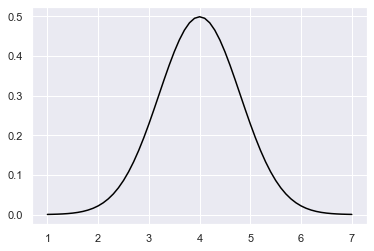

In [119]:
# 확률밀도 그래프 그리기
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8),
        color = 'black')

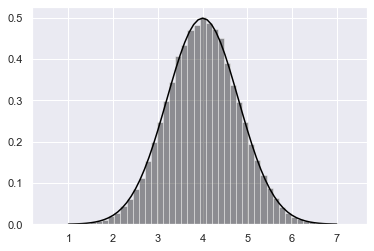

In [121]:
# 모집단의 히스토그램 그래프 겹쳐 그리기
sns.distplot(fish_10000, kde=False, norm_hist=True, color='black')
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8),
        color = 'black')

### 3.4.9 표본을 얻는 절차의 추상화

In [122]:
# stats.norm.rvs : 시작부터 정규분호를 따르는 난수 생성함수
sampling_norm = stats.norm.rvs(loc = 4, scale=0.8, size=10)
sampling_norm

array([3.56 , 2.878, 5.266, 3.164, 4.206, 2.432, 2.794, 3.748, 4.687,
       4.057])

In [123]:
# 표본평균
sp.mean(sampling_norm)

3.6791686098022693

## 3.5 표본 통계량 성질

### 3.5.1 시행
: 1회의 조사를 수행한 것
* 시행횟수 : 몇 번이고 시행을 반복하는게 가능한 경우, 반복한 횟수

### 3.5.2 표본분포
: 표본의 통계량을 따르는 확률분포

### 3.5.3 라이브러리 임포트

In [124]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [125]:
# 시뮬레이션 준비
population = stats.norm(loc=4, scale=0.8)

### 3.5.4 표본평균을 여러번 계산하기

In [126]:
sample_mean_array = np.zeros(10000)

In [127]:
# 배열에 10000개 표본평균 저장
np.random.seed(1)
for i in range(0, 10000) :
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [128]:
# 표본평균
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 3.5.5 표본평균의 평균값은 모평균에 가깝다

In [129]:
sp.mean(sample_mean_array)

4.004202422791747

In [130]:
sp.std(sample_mean_array, ddof=1)

0.2513580850860402

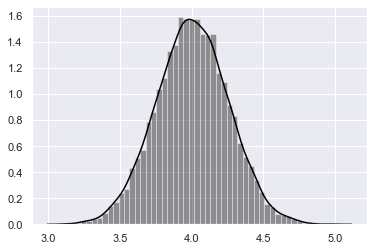

In [131]:
sns.distplot(sample_mean_array, color = 'black')

### 3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.

* 대상 : 표본평균
* 변화시키는 것 : 샘플사이즈
* 알고싶은 것 : 샘플사이즈가 커질수록 표본평균은 모평균에 가까워지는가 ?

In [132]:
# 이 항목을 살펴보는 것에 중점을 두고 시뮬레이션

In [133]:
size_array = np.arange(start = 10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [136]:
# 표본평균을 저장할 변수 준비
sample_mean_array_size = np.zeros(len(size_array))

In [137]:
np.random.seed(1)
for i in range(0, len(size_array)) :
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0, 0.5, 'sample mean')

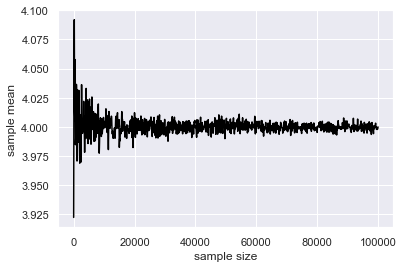

In [138]:
# 가로축이 샘플사이즈, 세로축인 표본평균인 그래프
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 3.5.7 표본평균을 몇 번이고 계산하는 함수 만들기

In [139]:
def calc_sample_mean(size, n_trial) :
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [140]:
np.random.seed(1)
sp.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

### 3.5.8 샘플사이즈를 바꿨을 때 표본평균의 분산

In [143]:
# 바이올린플룻을 이용하여 확인하기
np.random.seed(1)
# 샘플사이즈 10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size" : np.tile("size 10", 10000)
})

# 샘플사이즈 20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size" : np.tile("size 20", 10000)
})

# 샘플사이즈 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size" : np.tile("size 30", 10000)
})

# 종합
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

# 결과표시 
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


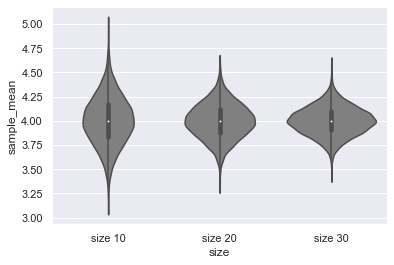

In [144]:
sns.violinplot(x= "size", y="sample_mean", data = sim_result, color='gray')

### 3.5.9 표본평균의 표준편차는 모집단보다 작다

* 대상 : 표본평균의 표준편차
* 변화시키는 것 : 샘플사이즈
* 알고 싶은 것 : 샘플사이즈가 커질수록 표본평균의 표준편차는 작아진다 -> 샘플사이즈가 커지면 표본평균은 보다 신뢰할 수 있는값이 된다.

In [147]:
# 샘플사이즈 준비
size_array = np.arange(start = 2, stop= 102, step=2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [148]:
# 변수준비
sample_mean_std_array = np.zeros(len(size_array))

In [149]:
np.random.seed(1)
for i in range(0, len(size_array)) :
    sample_mean = calc_sample_mean(size = size_array[i], n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

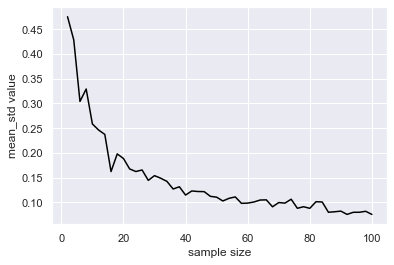

In [150]:
# 꺾은선 그래프 그리기
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 3.5.10 표준오차

표본평균의 표준편차 크기는 수식을 사용해서 계산할 수 있다. 이를 표준오차라 한다.(SE)

샘플사이즈가 커지면 표준오차는 작아진다

In [151]:
standard_error = 0.8/np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

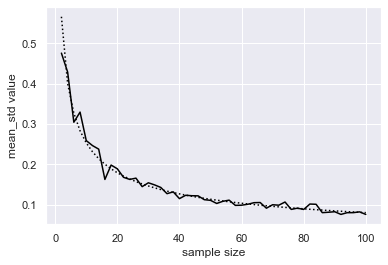

In [152]:
# 표준편차와 시뮬레이션 결과를 하나의 그래프에 겹쳐 그리기
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 3.5.12  표본분산의 평균값은 모분산과 차이가 있다

In [154]:
sample_var_array = np.zeros(10000)

In [155]:
# 데이터를 10개 골라서 표본분산 구하는 시행 10000번 반복
np.random.seed(1)
for i in range(0,10000) :
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof=0)

In [157]:
# 표본분산의 평균값
sp.mean(sample_var_array)

    # 과소평가 되는 것을 알 수 있다

0.5746886877332101

### 3 5.13 불편분산을 사용하면 편향이 사라진다

In [159]:
# 불편분산을 저장하는 변수
unbias_var_array = np.zeros(10000)

# 데이터를 10개 골라서 표본분산 구하는 시행 10000번 반복
np.random.seed(1)
for i in range(0,10000) :
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof=1)
    
# 불편분산의 평균값
sp.mean(unbias_var_array)

0.6385429863702334

### 3.5.14 샘플사이즈가 크면 불편분산은 모분산에 가까워진다

* 대상 : 불편분산
* 변화시키는것 : 샘플사이즈
* 알고싶은 것 : 샘플사이즈가 커지면 불편분산은 모분산에 가까워진다.

In [160]:
size_array = np.arange(start = 10, stop = 100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [161]:
# 불편분산 저장하는 변수
unbias_var_array_size = np.zeros(len(size_array))

In [162]:
np.random.seed(1)
for i in range(0, len(size_array)) :
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

Text(0, 0.5, 'unbias var')

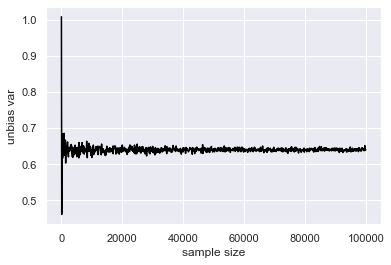

In [163]:
# 꺾은선 그래프 그리기
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 3.5.15 불편성
: 추정량의 기댓값이 진짜모수(모집단의 파라미터)가 되는 특성

* 불편성이 있다 -> 평균을 냈을 때 과대 또는 과소하지 않다. 즉, 편향이 없는 추정량

### 3.5.16 일치성
: 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성

* 일치성이 있다 -> 샘플사이즈가 무한할 때 추정량과 모수가 일치한다.

### 3.5.18 큰수의 법칙
: 표본의 크기가 커지면 표본평균이 모평균에 가까워 지는 방법을 표현한 법칙

### 3.5.19  중심극한 정리
: 모집단의 분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워진다

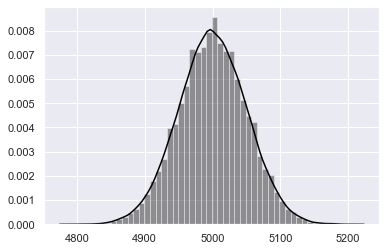

In [165]:
# 샘플사이즈와 시행횟수
n_size = 10000
n_trial = 50000

# 앞면이면 1, 뒷면이면 0 표시
coin = np.array([0,1])

# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)

# 동전을 n_size번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial) :
    count_coin[i] = sp.sum(
    np.random.choice(coin, size = n_size, replace=True))

# 히스토그램 그리기
sns.distplot(count_coin, color = 'black')

## 3.6 정규분포와 응용

### 3.6.2 확률밀도

In [166]:
# 원주율의 값 구하기
sp.pi

3.142

In [169]:
# 자연로그의 밑 : sp.exp 함수
sp.exp(1) # e의 1승은 e 자신값, 즉 2.7이다.

2.718281828459045

In [172]:
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2*sp.pi*sigma**2)) * \
    sp.exp(-((x-mu)**2) / (2*sigma**2))

0.22831135673627742

In [174]:
# 위의 식 간단하게 계산하기
stats.norm.pdf(loc = 4, scale = 0.8, x=3)

0.2283113567362774

In [175]:
# 평균4, 표준편차 0.8인 정규분포 인스턴스 생성해서 pdf함수 호출해도 동일한 결과 얻을 수 있다.
norm_dist = stats.norm(loc = 4, scale = 0.8) # 정규연속확률변수
norm_dist.pdf(x=3)

0.2283113567362774

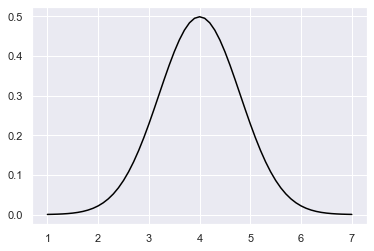

In [177]:
x_plot = np.arange(start=1, stop=7.1, step =0.1)
plt.plot(
    x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8),
    color = 'black')

### 3.6.3 표본이 어떤 값 이하가 되는 비율
-> 어떤 값 이하가 되는 데이터의 개수 / 샘플사이즈

In [178]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 3.189, 3.95 , 2.85 ])

In [179]:
# 3이하 데이터의 개수를 비교연산자를 이용해 계산
sp.sum(simulated_sample <=3)

1043

ㅡ# 샘플사이즈로 나누기
sp.sum(simulated_sample <=3) / len(simulated_sample)

### 3.4.2 표본을 얻는 프로세스

표본은 확률변수. 즉, 확률적으로 변화하는 값

### 3.4.3. 5마리 물고기의 예

In [101]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [103]:
# 랜덤으로 고르고 싶을때 : np.random.choice
    # replace = False : 같은 물고기 2번이상 선택 X
np.random.choice(fish_5, size = 1, replace = False)

array([5])

In [104]:
np.random.choice(fish_5, size = 3, replace=False)

array([6, 5, 4])

In [105]:
np.random.choice(fish_5, size = 3, replace=False)

array([3, 4, 5])

In [106]:
# np.random.seed(난수시드) : 매번 같은 데이터가 랜덤하게 선택됨.
# 인수로 넘기는 값은 아무거나 괜찮다. 인수로 같은 값을 지정하면 같은 결과가 나옴
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [107]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [108]:
# 골라낸 표본의 평균값 계산 -> 표본평균
np.random.seed(1)
sp.mean(
    np.random.choice(fish_5, size=3, replace=False)
)

4.333333333333333

### 3.4.4 난수
: 랜덤으로 골라낸 값. 분야에 따라 확률변수와 거의 같은 의미이다.

### 3.4.5 복원추출과 비복원 추출
*복원추출 : 추출된 표본을 다시 모집단에 되돌려놓음으로써 다시 추출될 수 있게 하는 샘플링 방법

*비복원추출 : 추출된 표본을 모집단에 다시 돌려 놓지 않는다(replace=False)

### 3.4.6  더 많은 물고기가 있는 호수에서 표본추출

In [109]:
fish_10000 = pd.read_csv("/Users/seuli/Desktop/개발자/통계학 source/sample/3-4-1-fish_length_100000.csv")
fish_10000.head()

,length
0,5.297442
1,3.505566
2,3.572546
3,3.135979
4,4.689275


In [110]:
len(fish_10000)

100000

In [115]:
# 표본 추출하기(10마리 샘플링)
sampling_result = np.random.choice(fish_10000, size=10, replace = False)
sampling_result

ValueError: 'a' must be 1-dimensional

In [114]:
# 표본평균 계산
sp.mean(sampling_result)

NameError: name 'sampling_result' is not defined

### 3.4.7 모집단 분포

In [ ]:
# 모집단의 평균값, 즉 모평균 구하기
sp.mean(fish_10000)

In [ ]:
# 모표준편차 구하기
sp.std(fish_10000, ddof=0)

In [ ]:
# 모분산 구하기
sp.var(fish_10000, ddof=0)

In [ ]:
# 모집단 히스토그램 그리기
sns.distplot(fish_10000, kde=False, color='black')

### 3.4.8 모집단분포와 정규분포 간 확률밀도함수 비교

In [117]:
# 평균 4, 분산 0.64인 ㅈㅇ규분포의 확률밀도를 1~7의 범위에서 표시
x = np.arange(start = 1, stop = 7.1, step=0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [118]:
# stats.norm.pdf : 확률밀도 계산.
# loc 평균값이고 scale : 표준편차
stats.norm.pdf(x = x, loc=4, scale = 0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

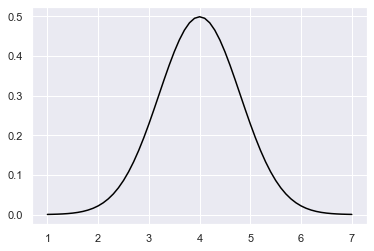

In [119]:
# 확률밀도 그래프 그리기
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8),
        color = 'black')

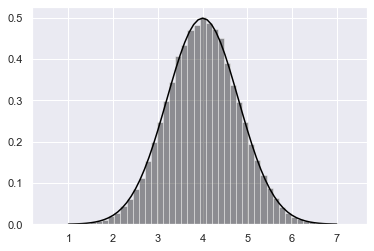

In [121]:
# 모집단의 히스토그램 그래프 겹쳐 그리기
sns.distplot(fish_10000, kde=False, norm_hist=True, color='black')
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8),
        color = 'black')

### 3.4.9 표본을 얻는 절차의 추상화

In [122]:
# stats.norm.rvs : 시작부터 정규분호를 따르는 난수 생성함수
sampling_norm = stats.norm.rvs(loc = 4, scale=0.8, size=10)
sampling_norm

array([3.56 , 2.878, 5.266, 3.164, 4.206, 2.432, 2.794, 3.748, 4.687,
       4.057])

In [123]:
# 표본평균
sp.mean(sampling_norm)

3.6791686098022693

## 3.5 표본 통계량 성질

### 3.5.1 시행
: 1회의 조사를 수행한 것
* 시행횟수 : 몇 번이고 시행을 반복하는게 가능한 경우, 반복한 횟수

### 3.5.2 표본분포
: 표본의 통계량을 따르는 확률분포

### 3.5.3 라이브러리 임포트

In [2]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # 기본 seaborn 테마, 크기 조정 및 색상 팔레트 사용

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [125]:
# 시뮬레이션 준비
population = stats.norm(loc=4, scale=0.8)

### 3.5.4 표본평균을 여러번 계산하기

In [126]:
sample_mean_array = np.zeros(10000)

In [127]:
# 배열에 10000개 표본평균 저장
np.random.seed(1)
for i in range(0, 10000) :
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [128]:
# 표본평균
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 3.5.5 표본평균의 평균값은 모평균에 가깝다

In [129]:
sp.mean(sample_mean_array)

4.004202422791747

In [130]:
sp.std(sample_mean_array, ddof=1)

0.2513580850860402

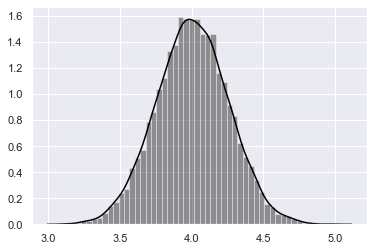

In [131]:
sns.distplot(sample_mean_array, color = 'black')

### 3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.

* 대상 : 표본평균
* 변화시키는 것 : 샘플사이즈
* 알고싶은 것 : 샘플사이즈가 커질수록 표본평균은 모평균에 가까워지는가 ?

In [132]:
# 이 항목을 살펴보는 것에 중점을 두고 시뮬레이션

In [133]:
size_array = np.arange(start = 10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [136]:
# 표본평균을 저장할 변수 준비
sample_mean_array_size = np.zeros(len(size_array))

In [137]:
np.random.seed(1)
for i in range(0, len(size_array)) :
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0, 0.5, 'sample mean')

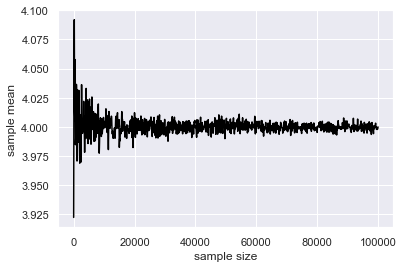

In [138]:
# 가로축이 샘플사이즈, 세로축인 표본평균인 그래프
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 3.5.7 표본평균을 몇 번이고 계산하는 함수 만들기

In [139]:
def calc_sample_mean(size, n_trial) :
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [140]:
np.random.seed(1)
sp.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

### 3.5.8 샘플사이즈를 바꿨을 때 표본평균의 분산

In [143]:
# 바이올린플룻을 이용하여 확인하기
np.random.seed(1)
# 샘플사이즈 10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size" : np.tile("size 10", 10000)
})

# 샘플사이즈 20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size" : np.tile("size 20", 10000)
})

# 샘플사이즈 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size" : np.tile("size 30", 10000)
})

# 종합
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

# 결과표시 
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


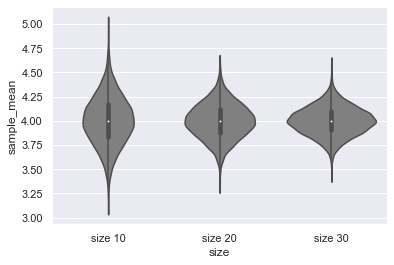

In [144]:
sns.violinplot(x= "size", y="sample_mean", data = sim_result, color='gray')

### 3.5.9 표본평균의 표준편차는 모집단보다 작다

* 대상 : 표본평균의 표준편차
* 변화시키는 것 : 샘플사이즈
* 알고 싶은 것 : 샘플사이즈가 커질수록 표본평균의 표준편차는 작아진다 -> 샘플사이즈가 커지면 표본평균은 보다 신뢰할 수 있는값이 된다.

In [147]:
# 샘플사이즈 준비
size_array = np.arange(start = 2, stop= 102, step=2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [148]:
# 변수준비
sample_mean_std_array = np.zeros(len(size_array))

In [149]:
np.random.seed(1)
for i in range(0, len(size_array)) :
    sample_mean = calc_sample_mean(size = size_array[i], n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

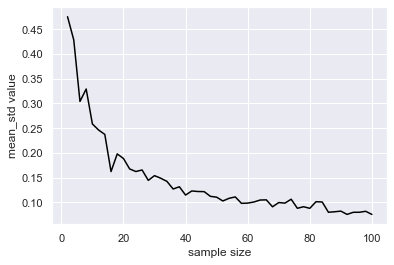

In [150]:
# 꺾은선 그래프 그리기
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 3.5.10 표준오차

표본평균의 표준편차 크기는 수식을 사용해서 계산할 수 있다. 이를 표준오차라 한다.(SE)

샘플사이즈가 커지면 표준오차는 작아진다

In [151]:
standard_error = 0.8/np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

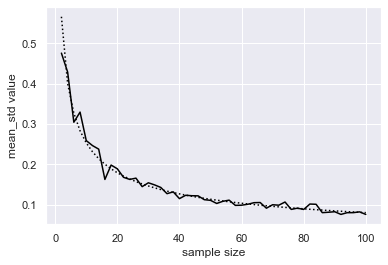

In [152]:
# 표준편차와 시뮬레이션 결과를 하나의 그래프에 겹쳐 그리기
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 3.5.12  표본분산의 평균값은 모분산과 차이가 있다

In [154]:
sample_var_array = np.zeros(10000)

In [155]:
# 데이터를 10개 골라서 표본분산 구하는 시행 10000번 반복
np.random.seed(1)
for i in range(0,10000) :
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof=0)

In [157]:
# 표본분산의 평균값
sp.mean(sample_var_array)

    # 과소평가 되는 것을 알 수 있다

0.5746886877332101

### 3 5.13 불편분산을 사용하면 편향이 사라진다

In [159]:
# 불편분산을 저장하는 변수
unbias_var_array = np.zeros(10000)

# 데이터를 10개 골라서 표본분산 구하는 시행 10000번 반복
np.random.seed(1)
for i in range(0,10000) :
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof=1)
    
# 불편분산의 평균값
sp.mean(unbias_var_array)

0.6385429863702334

### 3.5.14 샘플사이즈가 크면 불편분산은 모분산에 가까워진다

* 대상 : 불편분산
* 변화시키는것 : 샘플사이즈
* 알고싶은 것 : 샘플사이즈가 커지면 불편분산은 모분산에 가까워진다.

In [160]:
size_array = np.arange(start = 10, stop = 100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [161]:
# 불편분산 저장하는 변수
unbias_var_array_size = np.zeros(len(size_array))

In [162]:
np.random.seed(1)
for i in range(0, len(size_array)) :
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

Text(0, 0.5, 'unbias var')

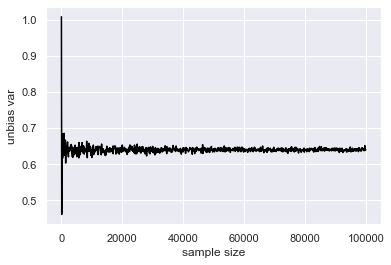

In [163]:
# 꺾은선 그래프 그리기
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 3.5.15 불편성
: 추정량의 기댓값이 진짜모수(모집단의 파라미터)가 되는 특성

* 불편성이 있다 -> 평균을 냈을 때 과대 또는 과소하지 않다. 즉, 편향이 없는 추정량

### 3.5.16 일치성
: 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성

* 일치성이 있다 -> 샘플사이즈가 무한할 때 추정량과 모수가 일치한다.

### 3.5.18 큰수의 법칙
: 표본의 크기가 커지면 표본평균이 모평균에 가까워 지는 방법을 표현한 법칙

### 3.5.19  중심극한 정리
: 모집단의 분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워진다

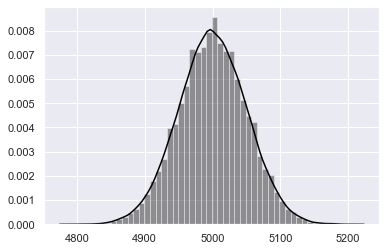

In [165]:
# 샘플사이즈와 시행횟수
n_size = 10000
n_trial = 50000

# 앞면이면 1, 뒷면이면 0 표시
coin = np.array([0,1])

# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)

# 동전을 n_size번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial) :
    count_coin[i] = sp.sum(
    np.random.choice(coin, size = n_size, replace=True))

# 히스토그램 그리기
sns.distplot(count_coin, color = 'black')

## 3.6 정규분포와 응용

### 3.6.2 확률밀도

In [3]:
# sp.pi : 원주율의 값 구하기
sp.pi

3.142

In [4]:
# 자연로그의 밑 : sp.exp 함수
sp.exp(1) # e의 1승은 e 자신값, 즉 2.7이다.

2.718281828459045

In [5]:
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2*sp.pi*sigma**2)) * \
    sp.exp(-((x-mu)**2) / (2*sigma**2))

0.22831135673627742

In [6]:
# 위의 식 간단하게 계산하기
stats.norm.pdf(loc = 4, scale = 0.8, x=3) # 확률밀도함수 구하기

0.2283113567362774

In [7]:
# 평균4, 표준편차 0.8인 정규분포 인스턴스 생성해서 pdf함수 호출해도 동일한 결과 얻을 수 있다.
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x=3)

0.2283113567362774

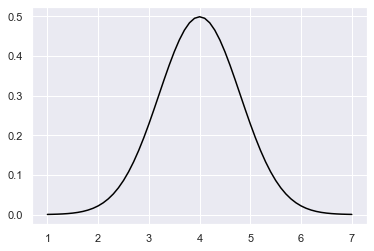

In [8]:
x_plot = np.arange(start=1, stop=7.1, step =0.1)
plt.plot(
    x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8),
    color = 'black')

### 3.6.3 표본이 어떤 값 이하가 되는 비율
-> 어떤 값 이하가 되는 데이터의 개수 / 샘플사이즈

In [9]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 3.189, 3.95 , 2.85 ])

In [10]:
# 3이하 데이터의 개수를 비교연산자를 이용해 계산
sp.sum(simulated_sample <=3)

1043

In [13]:
# 샘플사이즈로 나누기
sp.sum(simulated_sample <=3) / len(simulated_sample)

0.1043

### 3.6.4 누적분포함수
: stats.norm.cdf

In [15]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
    # 위의 결과와 거의 일치

0.10564977366685535

In [17]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)
    # 정규분포는 평균에 대해 좌우대칭이므로 데이터가 평균값이하가 될 확률은 반 

0.5

데이터를 하나하나 세어보지 않고 적분을 이용하여 확률을 간단히 계산할 수 있다.

### 3.6.5 하측확률과 퍼센트포인트
* 하측확률 : 데이터가 어떤 값 이하가 될 확률 (누적분포함수 사용하여 구함)
* 퍼센트포인트 : 어떤 확률이 될 기준치 (stats.norm.ppf 함수)

In [18]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025) # 하측확률이 2.5%가 되는 퍼센트포인트 구하기

2.4320288123679563

In [20]:
# 하측확률과 퍼센트포인트는 다음과 같은 관계가 성립한다.
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3) # 3이하가 될 확률 구하기
stats.norm.ppf(loc = 4, scale = 0.8, q = lower) # ppf의 인자로 cdf 함수의 결과를 넣으면 원래대로 돌아온다.

    # 즉, 확률이 다시 확률변수의 값으로 돌아온다.

3.0000000000000004

In [21]:
# 하측확률이 50%이 되는 퍼센트포인트는 평균과 일치한다.
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### 3.6.6 표준정규분포
: 평균 0 , 분산(표준편차) 1인 정규분포

### 3.6.7 t값 
: (표본평균 - 모평균) / 표준오차

### 3.6.8 t값의 표본분포

In [22]:
# 모집단분포가 정규분포임을 가정했을 때 표본분포를 구하는 것도 가능

< t값의 표본분포 시뮬레이션으로 확인하기 >
1. 모집단분포가 평균=4, 표준편차=0.8인 모집단에서 표본추출 시뮬레이션 한다. 이때 샘플사이즈는 10
2. 얻은 표본에서 표본평균 구하기
3. 얻은 표본에서 표준오차를 구하기, 표준오차는 표본평균의 표준편차로 간주한다.
4. (표본평균 - 모평균) / 표준오차 계산으로 t값 계산
5. 이 시행 10000번 반복

In [23]:
# 난수 시드 설정
np.random.seed(1)

# t값을 저장한ㄹ 변수 설정
t_value_array = np.zeros(10000)

# 정규분포 클래스와 인스턴스
norm_dist = stats.norm(loc = 4, scale = 0.8)

# 시뮬레이션 실행
for i in range(0, 10000) :
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

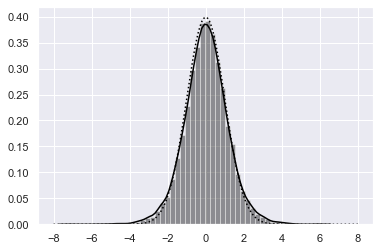

In [24]:
# 히스토그램과 표준정규분포의 확률밀도 그리기

# t값의 히스토그램
sns.distplot(t_value_array, color = 'black')

# 표준정규분포의 확륣밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x=x), color =  'black', linestyle = 'dotted')

### 3.6.9 t분포
: 모집단분포가 정규분포일 때, t값의 표본분포를 t분포라고 한다.

t분포의 평균값은 0이다. t분포의 분산은 1보다 조금 크다. 자유도를 n으로 했을 때 이와 같이 계산한다.

t(n)의 분산 = n / (n-2)

지유도가 커질수록 분산은 1에 가까워지고, 표준정규분포와 거의 차이가 나지 않는다. 반대로, 샘플사이즈가 작아지면 차이가 커진다.

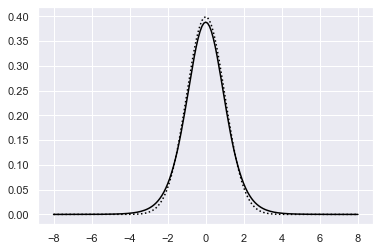

In [25]:
# t 분포의 확률밀도와 표준정규분포의 확률밀도 겹쳐서 표기해보기
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), color = 'black')
    
    # t분포(실선)가 좀 더 넓은 분포라는 것을 알 수 있다 -> 평균값과 크게 다른 데이터가 발생하기 쉬워짐

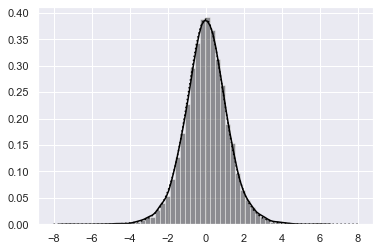

In [26]:
# 시뮬레이션 결과를 겹치면 커널밀도추정의 결과와 거의 일치한다.
sns.distplot(t_value_array, color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9),
        color = 'black', linestyle = 'dotted')

t분포의 의미 
: 모분산을 모르는 상황에서도 표본평균의 분포에 대해 이야기 할 수 있다. 

## 3.7 추정
: 모수, 즉 모집단의 파라미터 추정해보기

모집단의 분포가 정규분포임을 가정했을 때, 모수를 알면 모집단의 분포를 추정할 수 있다.

### 3.7.1 분석 준비

In [27]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # 기본 seaborn 테마, 크기 조정 및 색상 팔레트 사용

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [29]:
fish = pd.read_csv('/Users/seuli/Desktop/개발자/통계학 source/sample/3-7-1-fish_length.csv')["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

### 3.7.2 점추정
: 모수(모집단분포의 파라미터)를 어느 1개의 값으로 추정하는 추정 방법

모평균을 추정하는 경우에는 표본평균을 추정값으로 사용 -> 표본에서 평균값 계산


< 표본평균을 사용해도 좋은 이유 >
표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문. 바람직한 성질을 가진 통계량이기 때문

In [30]:
mu = sp.mean(fish)
mu

4.187039324504523

In [32]:
# 모분산의 추정에 대해서도 표본에서 계산한 통계량을 사용할 수 있다. 점추정값으로는 불편분산 사용
sigma_2 = sp.var(fish, ddof = 1)
sigma_2

0.6803017080832622

### 3.7.3 구간추정
: 추정값이 폭을 가지게 하는 추정방법

추정오차가 작으면 구간추정의 폭이 좁아진다. 샘플사이즈가 커져도 구간추정의 폭은 좁다진다.


### 3.7.4 신뢰계수와 신뢰구간
* 신뢰계수 : 구간추정의 폭에 대한 신뢰정도를 확률로 표현한 것
* 신뢰구간 : 특정 신뢰계수를 만족하는 구간

신뢰계수가 클수록 신뢰구간의 폭이 넓어진다

### 3.7.5 신뢰한계
: 신뢰구간의 하한값과 상한값. 하측신뢰한계, 상측신뢰한계

### 3.7.6 신뢰구간 계산 방법
: t분포의 퍼센트포인트(어떤 확률이 되는 기준점) 사용

예) 신뢰계수 95% 라고 했을 때, t분포를 따른다면 2.5% 지점과 97.5% 지점을 사용

### 3.7.7 구간추정(실습)
: 구간추정에 필요한 정보는 자유도(샘플사이즈-1), 표본평균, 표준오차 

In [33]:
# 자유도 구하기(샘플사이즈 -1 하기)
    # 샘플사이즈가 크면 추정 정확도가 높아진다
df = len(fish) -1
df

9

In [34]:
# 표준오차 구하기
sigma = sp.std(fish, ddof = 1)
se = sigma / sp.sqrt(len(fish))
se

0.2608259396768776

In [36]:
# 신뢰구간을 계산하기 : stats.t.interval 함수
    # alpha - 신뢰계수, df - 자유도, loc - 표본평균, scale - 표준오차
interval = stats.t.interval(
            alpha = 0.95, df = df, loc = mu, scale = se)
interval 

    # 첫번째로 하측신뢰한계, 두번째로 상측신뢰한계가 나온다

(3.597010056835825, 4.777068592173221)

### 3.7.8 신뢰구간을 구하는 방법 상세 설명
1. 어떤 자유도를 가지는 t분포를 따르는 97.5% 지점 계산 
   
   1.1 t분포를 따르는 97.5% 지점을 t(0.975)라고 표기한다.
   
   1.2 t분포는 평균에 대해 좌우대칭이기 때문에 2.5% 지점은 -t(0.975)로 표기한다.
   
   1.3 t분포를 따르는 변수가 -t 이상 t이하가 되는 확률이 95%이다.
   
       1.3.1 이때 95%가 신뢰계수가 된다.
2. 표본평균 -t(0.975) * 표준오차가 하측신뢰한계이다.

3. 표본평균 +t(0.975) * 표준오차가 상측신뢰한계이다.

In [37]:
# 97.5% 지점 구하기
t_975 = stats.t.ppf(q = 0.975, df = df)
t_975

2.2621571627409915

In [39]:
# 하측신뢰한계 구하기
lower = mu - t_975 * se
lower

3.597010056835825

In [40]:
# 상측신뢰한계
upper =  mu + t_975 * se
upper

4.777068592173221

### 3.7.9  신뢰구간의 폭을 결정하는 요소
표본의 분산 크기가 크면 평균값을 신뢰할 수 없으므로 신뢰구간의 폭이 넓어진다

In [41]:
# 표본표준편차 10배로 늘려서 95% 신뢰구간 계산해보기
se2 = (sigma*10) / sp.sqrt(len(fish))
stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se2)

(-1.7132533521824618, 10.087332001191509)

In [42]:
# 신뢰구간의 폭이 넓어진다 -> 모평균이 어디 있는지 잘 모르게된다

In [44]:
# 샘플사이즈가 커지면 표본평균을 신뢰할 수 있게 되므로 신뢰구간이 좁아진다.
df2 = (len(fish)*10) -1
se3 = sigma / sp.sqrt(len(fish)*10)
stats.t.interval(alpha = 0.95, df = df2, loc = mu, scale = se3)

(4.0233803082774395, 4.350698340731607)

In [46]:
# 99% 신뢰구간 구하기 (95%보다 폭이 넓어짐)
stats.t.interval(alpha = 0.99, df = df, loc = mu, scale = se)

(3.3393979149413977, 5.034680734067649)

### 3.7.10 구간추정 결과의 해석

신뢰계수의 95%의 95%는 아래와 같이 얻을 수 있다.

1. 원래 모집단 분포에서 표본 추출
2. 이번에도 같은 방법으로 95% 신뢰구간 계산
3. 이 시행을 여러번 반복
4. 모든 시행 중 원래 모집단이 신뢰구간에 포함되는 비율이 95%이다.

In [47]:
# 시뮬레이션을 통해 확인해보자
     # 신뢰구간이 모평균(4)을 포함하면 True가 되는 변수 준비
be_included_array = np.zeros(20000, dtype = "bool") # 시행횟수 20000번이니 그만큼 큰 배열이 필요. 또한 True나 False밖에 될 수 없으므로 dtype = 'bool'
be_included_array

array([False, False, False, ..., False, False, False])

In [48]:
# 95% 신뢰구간을 구하는 시행을 20000번 반복한다.
# 신뢰구간이 모평균(4)를 포함하면 True

np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8) # 정규분포 클래스의 인스턴스
for i in range(0, 20000) :
    sample = norm_dist.rvs(size = 10) # 난수생성
    df = len(sample)-1 # 자유도
    mu = sp.mean(sample)
    std = sp.std(sample, ddof = 1) # 표준편차
    se = std / sp.sqrt(len(sample)) # 표준오차
    interval = stats.t.interval(0.95, df, mu, se) # 신뢰구간계산
    if(interval[0] <= 4 and interval[1] >= 4) :
        be_included_array[i] = True

In [49]:
# 신뢰구간이 모평균(4)을 포함한 비율
sum(be_included_array) / len(be_included_array)

0.948

## 3.8 통계적가설검정